In [13]:
!git clone https://github.com/prasenjit52282/GridWorld.git
import os
os.chdir('GridWorld')

Cloning into 'GridWorld'...
remote: Enumerating objects: 513, done.
remote: Counting objects: 100% (180/180), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 513 (delta 68), reused 154 (delta 65), pack-reused 333 (from 1)
Receiving objects: 100% (513/513), 60.59 MiB | 12.83 MiB/s, done.
Resolving deltas: 100% (220/220), done.


In [14]:
import numpy as np
from gridworld import GridWorld
import random
import matplotlib.pyplot as plt

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
world=\
    """
    wwwwwwwwwwwwwwwwwwwww
    wa         o      o w
    w www www wwwww www w
    w o                w
    w o www ooo ooo www w
    w o   o ooo ooo o   w
    w www wwwww wwwww www
    w      o     o      w
    www www ooo ooo wwwww
    w   o ooooooo o o   w
    w www ooooooo o www w
    w    o   ooo   o    w
    w wwwww www wwwww www
    w o     o o     o   w
    w o wwwww wwwww o www
    w o               o w
    w www www www www www
    w      o   g   o    w
    wwwwwwwwwwwwwwwwwwwww
    """
env=GridWorld(world,slip=0)

[[-3.33205798e+00 -3.33073057e+00 -3.33151140e+00 -3.33151140e+00]
 [-3.33244059e+00 -3.33205798e+00 -3.33151140e+00 -3.33205798e+00]
 [-3.33270841e+00 -3.33244059e+00 -3.33205798e+00 -3.33244059e+00]
 [-3.33289589e+00 -3.33270841e+00 -3.33244059e+00 -3.33270841e+00]
 [-3.33302712e+00 -3.33270841e+00 -3.33270841e+00 -3.33289589e+00]
 [-3.33311899e+00 -3.33302712e+00 -3.33289589e+00 -3.33302712e+00]
 [-3.33318329e+00 -3.33311899e+00 -3.33302712e+00 -3.33311899e+00]
 [-3.33322830e+00 -3.33318329e+00 -3.33311899e+00 -3.33318329e+00]
 [-3.33325981e+00 -3.33318329e+00 -3.33318329e+00 -3.33322830e+00]
 [-1.02333282e+02 -3.33325981e+00 -3.33322830e+00 -3.33325981e+00]
 [-3.33332910e+00 -1.02333282e+02 -3.33325981e+00 -1.02333282e+02]
 [-3.33332728e+00 -3.33332910e+00 -1.02333282e+02 -3.33332910e+00]
 [-3.33332468e+00 -3.33332728e+00 -3.33332910e+00 -3.33332728e+00]
 [-3.33332098e+00 -3.33332468e+00 -3.33332728e+00 -3.33332468e+00]
 [-3.33332468e+00 -3.33331568e+00 -3.33332468e+00 -3.33332098e

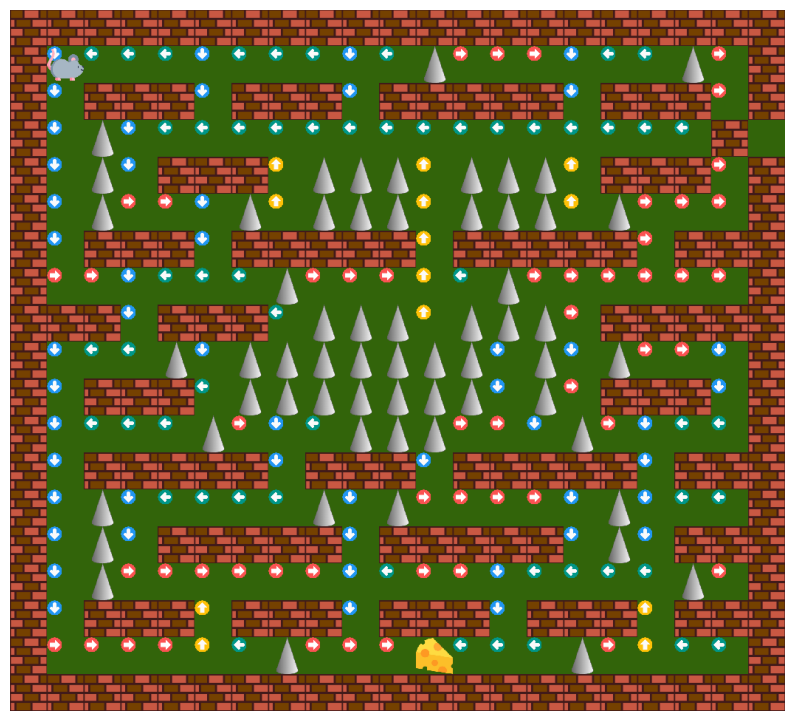

In [17]:
# Value Iteration

V=np.zeros((env.state_count,1))
V_prev=np.random.random((env.state_count,1))
eps=1e-7
gamma=0.7

while np.abs(V-V_prev).sum()>eps:
    Q_sa=env.R_sa+gamma*np.squeeze(np.matmul(env.P_sas,V),axis=2)
    V_prev=V.copy()
    V=np.max(Q_sa,axis=1,keepdims=True)
pi=np.argmax(Q_sa,axis=1)
print(Q_sa)
print("Pi:",pi)
screenshot = env.getScreenshot(pi)

plt.figure(figsize=(10, 10))
plt.imshow(screenshot)
plt.axis('off')
plt.show()

[[  -7.24652894   -6.60065302   -6.94058772   -6.94058772]
 [  -7.52187605   -7.24652894   -6.94058772   -7.24652894]
 [  -7.81588583   -7.52419517   -7.24652894   -7.52204029]
 [  -9.36285523   -8.38436219   -7.52846091   -8.75100205]
 [  -9.36161669   -9.36119889   -8.73341971   -9.40051996]
 [  -9.29513729   -9.29934484   -9.39931379   -9.31559867]
 [  -9.22437678   -9.23233838   -9.29511256   -9.26292823]
 [  -9.14574948   -9.16396212   -9.22786519   -9.18696278]
 [  -9.08425486   -9.06055732   -9.16661113   -9.0987464 ]
 [ -99.99995543   -9.06382888   -9.06638594   -9.06887823]
 [   0.            0.            0.            0.        ]
 [  -8.00539041   -8.00402384  -99.76736949   -8.03674918]
 [  -8.07073712   -7.98457262   -8.0489483    -7.95008086]
 [  -8.06450835   -8.12185348   -8.04018817   -8.09061403]
 [  -8.12391528   -8.12626988   -8.08789803   -8.08643758]
 [  -8.19071475   -8.09175047   -8.08109775   -8.11295135]
 [ -99.32177693   -8.22320072   -8.13924929   -8.098282 

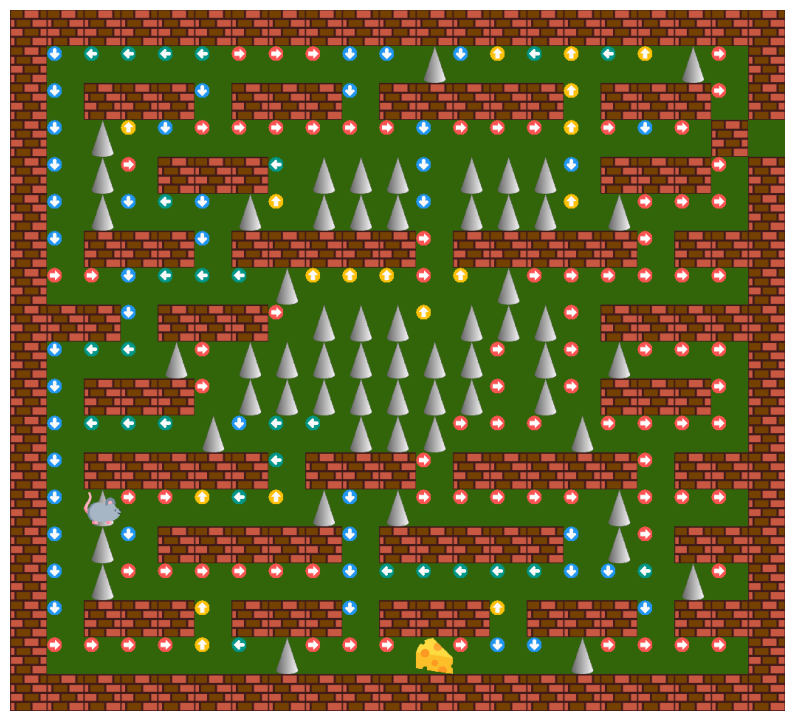

In [20]:
# Q-learning

alpha = 0.3
gamma = 0.9
epsilon = 0.4
episodes = 10000


Q = np.zeros((env.state_count, 4))

for episode in range(episodes):
    state = env.reset()
    done = False

    while not done:

        if random.uniform(0, 1) < epsilon:
            action = env.random_action()
        else:
            action = np.argmax(Q[state])


        next_state, reward, done, _ = env.step(action)


        best_next_action = np.argmax(Q[next_state])
        td_target = reward + gamma * Q[next_state][best_next_action]
        td_error = td_target - Q[state][action]
        Q[state][action] += alpha * td_error

        state = next_state

print(Q)
pi = np.argmax(Q, axis=1)
print("Pi:", pi)
screenshot = env.getScreenshot(pi)

plt.figure(figsize=(10, 10))
plt.imshow(screenshot)
plt.axis('off')
plt.show()